<a href="https://colab.research.google.com/github/d61h6k4/EML/blob/main/LM_BiGram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
import requests
import torch

In [ ]:
from torch.nn import functional as F
from matplotlib import pyplot as plt

In [ ]:
words = requests.get("https://raw.githubusercontent.com/karpathy/makemore/master/names.txt").text.split('\n')

In [ ]:
itoa = {i + 1: ch for i, ch in enumerate(sorted(set((ch for w in words for ch in w))))}
itoa[0] = '.'
atoi = {ch: i for i, ch in itoa.items()}

In [ ]:
xs = []
ys = []

for w in words:
    enriched_word = '.' + w + '.'
    for ch1, ch2 in zip(enriched_word, enriched_word[1:]):
        xs.append(atoi[ch1])
        ys.append(atoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"Dataset contains {num} examples")

Dataset contains 228146 examples


In [ ]:
N = len(itoa) # vocabulary size

In [ ]:
W = torch.randn((27, 27), requires_grad=True)

In [ ]:
for ix in range(1000):
    # forward
    xenc = F.one_hot(xs, num_classes=N).float()
    logits = xenc @ W
    prob = F.softmax(logits, dim=1)
    loss = -(prob * F.one_hot(ys, num_classes=N).float()).sum(1).log().mean() + 0.01 * (W**2).mean()
    
    if ix % 50 == 0:
        print(f"loss = {loss.item()}")
    # zero grad and backpropogate
    W.grad = None
    loss.backward()
    
    # update
    W.data += -1.1 * W.grad

loss = 3.6354827880859375
loss = 3.308671236038208
loss = 3.0976760387420654
loss = 2.9632503986358643
loss = 2.8731043338775635
loss = 2.8085122108459473
loss = 2.7600531578063965
loss = 2.7228407859802246
loss = 2.6938583850860596
loss = 2.670914888381958
loss = 2.6523597240448
loss = 2.637005567550659
loss = 2.6240315437316895
loss = 2.612880229949951
loss = 2.603166103363037
loss = 2.5946133136749268
loss = 2.587017297744751
loss = 2.580223798751831
loss = 2.568574905395508


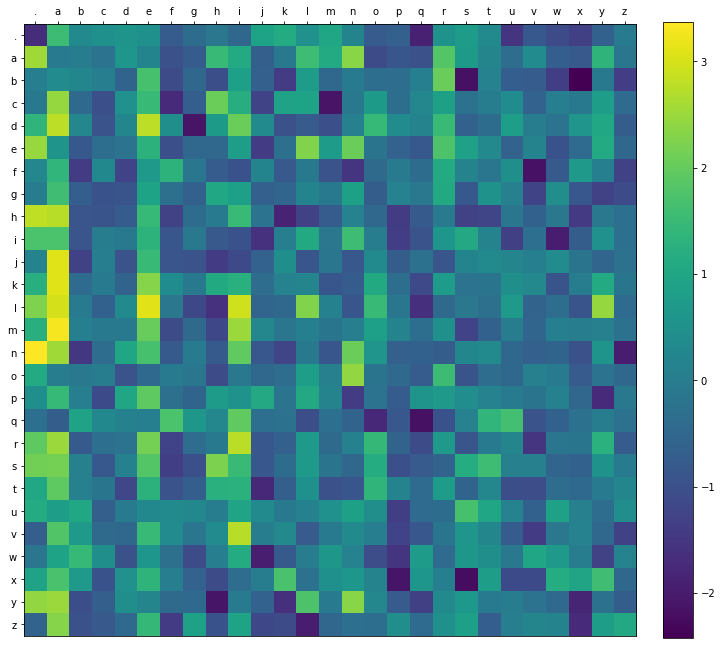

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(W.data.numpy())
ax.xaxis.tick_top()
ax.set_xticks(list(range(N)))
ax.set_xticklabels([itoa[i] for i in range(N)])
ax.set_yticks(list(range(N)))
ax.set_yticklabels([itoa[i] for i in range(N)])

fig.colorbar(im, fraction=0.046, pad=0.04)
fig.show()

In [ ]:
for _ in range(5):
    out = []
    ix = 0
    while True:
        with torch.no_grad():
            xenc = F.one_hot(torch.tensor([ix]), num_classes=N).float()
            logits = xenc @ W
            prob = F.softmax(logits, dim=1)
            ix = torch.multinomial(prob, 1, replacement=True).item()
        out.append(itoa[ix])
        
        if ix == 0:
            break
        
    print("".join(out))

nelma.
ash.
fsh.
thter.
ddeyjarilgeeronnyan.


In [ ]:
for name in ["emma", "daniel", "danil", "andrej"]:
    xs = []
    ys = []
    ename = "." + name + "."
    for ch1, ch2 in zip(ename, ename[1:]):
        xs.append(atoi[ch1])
        ys.append(atoi[ch2])

    with torch.no_grad():
        xenc = F.one_hot(torch.tensor(xs), num_classes=N).float()
        logits = xenc @ W
        prob = F.softmax(logits, dim=1)
        nll = -(prob * F.one_hot(torch.tensor(ys), num_classes=N).float()).sum(1).log().sum()
    print(f"{name} = {nll}")


emma = 13.47731876373291
daniel = 15.469144821166992
danil = 13.828144073486328
andrej = 21.34560775756836
